<a href="https://colab.research.google.com/github/saisubham2001/saisubham2001-/blob/main/time_series_analysis_covid19_cases_arima_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis Covid19 Cases-ARIMA Model

The first case of the COVID-19 pandemic in Kerala (which was also the first confirmed case in all of India) was confirmed in Thrissur on 30 January 2020. On 12 May 2021 Kerala reported the largest single day spike with 43,529 new cases. As of 26 July 2021, there have been 32,83,116 confirmed cases, test positivity rate is at 10.59% (12.46% cumulative), (thrice the national average) with 31,29,628 (95.32%) recoveries and 16,170 deaths in the state.

Doing **Time Series Analysis** on [Latest Covid-19 Confirmed Cases Kerala](http://www.kaggle.com/anandhuh/covid19-confirmed-cases-kerala) Dataset, using **ARIMA** model, I will predict Covid-19 confirmed cases for next 2 weeks

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,7

import warnings
warnings.filterwarnings('ignore')

## Reading dataset

In [2]:
# loading data into dataframe
df = pd.read_csv('/content/Covid 19 Confirmed Cases-Kerala.csv')

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#parse strings to datetime type
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)

# set Date column as index
df = df.set_index('Date')

In [4]:
# first five rows of dataframe
df.head()

,Confirmed
Date,
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,1.0
2020-02-03,1.0
2020-02-04,0.0


In [5]:
# last 5 rows of dataframe
df.tail()

,Confirmed
Date,
2022-05-16,324.0
2022-05-17,596.0
2022-05-18,501.0
2022-05-19,556.0
2022-05-20,558.0


## Exploratory Data Analysis

In [6]:
# column names
df.columns

Index(['Confirmed'], dtype='object')

In [7]:
# shape of the dataframe
df.shape

(841, 1)

In [8]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 841 entries, 2020-01-31 to 2022-05-20
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  841 non-null    float64
dtypes: float64(1)
memory usage: 13.1 KB


In [9]:
# checking for null values
df.isnull().sum()

Confirmed    0
dtype: int64

In [10]:
# descriptive statistics of data
df.describe()

,Confirmed
count,841.000000
mean,7788.395957
std,10295.657109
min,0.000000
25%,438.000000
50%,4470.000000
75%,9445.000000
max,55475.000000


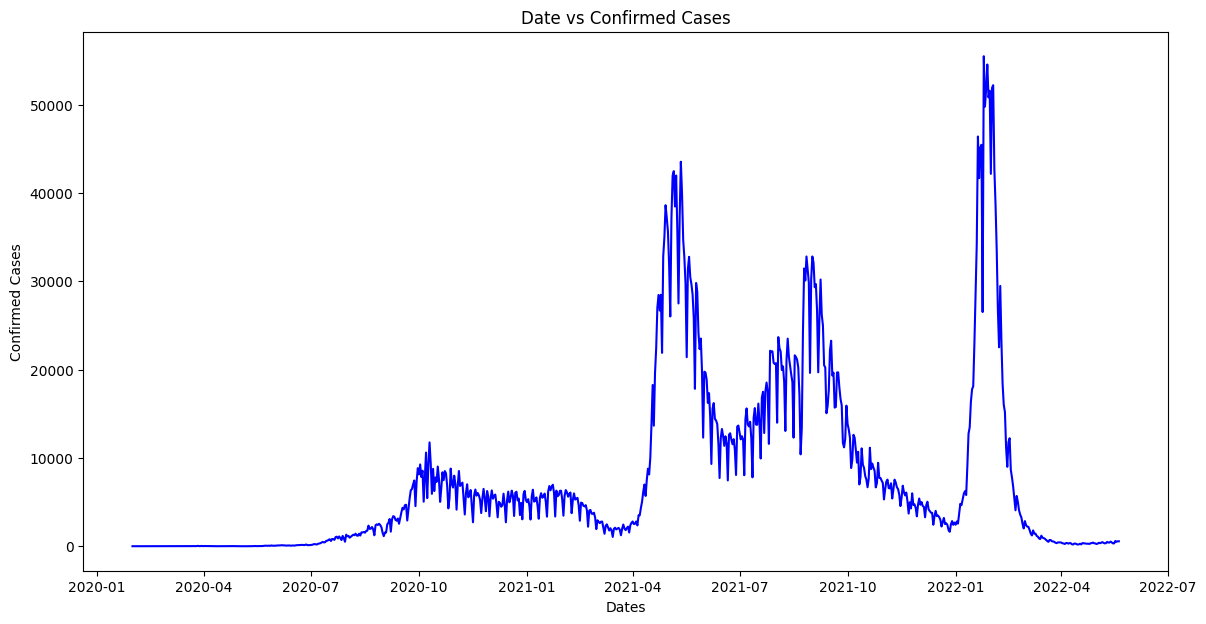

In [11]:
# plot graph

plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('Date vs Confirmed Cases')
plt.plot(df, color='b')

## Determining Rolling Statistics

In [12]:
# rolling mean
rolmean = df.rolling(window=3).mean()
rolmean.head()

,Confirmed
Date,
2020-01-31,NaN
2020-02-01,NaN
2020-02-02,0.333333
2020-02-03,0.666667
2020-02-04,0.666667


In [13]:
# rolling standard deviation
rolstd = df.rolling(window=3).std()
rolstd.head()

,Confirmed
Date,
2020-01-31,NaN
2020-02-01,NaN
2020-02-02,0.57735
2020-02-03,0.57735
2020-02-04,0.57735


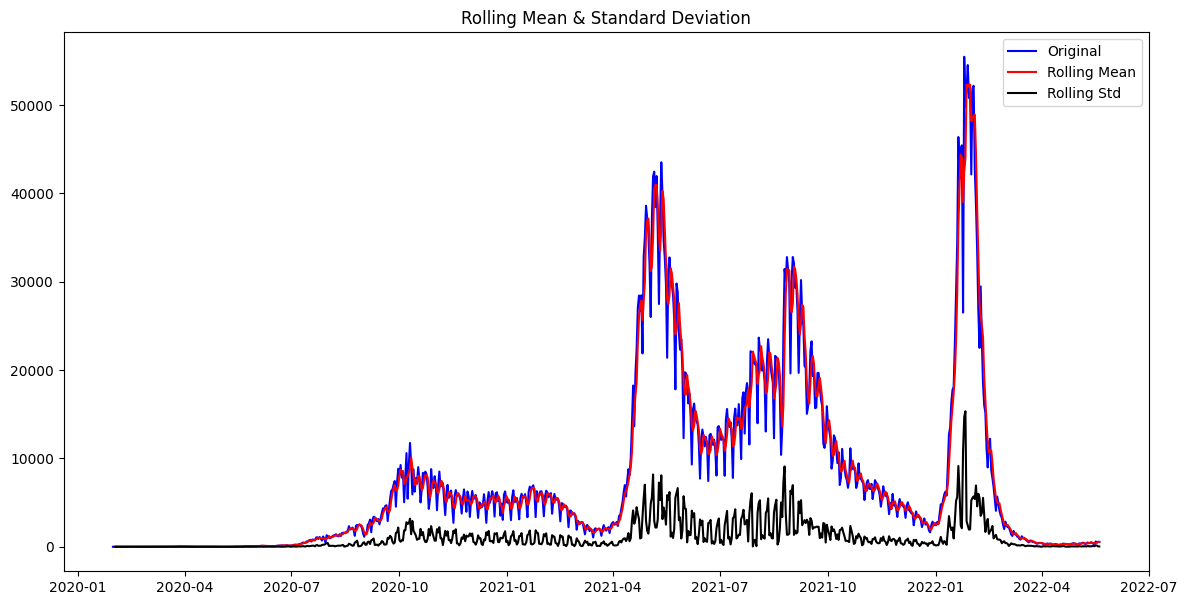

In [14]:
# plotting rolling statistics
org = plt.plot(df, color='b', label='Original')
mean = plt.plot(rolmean, color='r', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## Dickey-Fuller Test

In [15]:
# perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')

dftest = adfuller(df.Confirmed, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p value','#Lags used', 'No:of observations found'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test
Test Statistic               -2.946537
p value                       0.040198
#Lags used                   20.000000
No:of observations found    820.000000
Critical Value (1%)          -3.438350
Critical Value (5%)          -2.865071
Critical Value (10%)         -2.568650
dtype: float64


In [16]:
# Wrapping visual and statistical tools in a single function

def test_stationarity(timeseries):

    # Determining rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()

    # Plot rolling statistics
    org = plt.plot(timeseries, color='b', label='Original')
    mean = plt.plot(rolmean, color='r', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries.Confirmed, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p value','#Lags used', 'No:of observations found'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

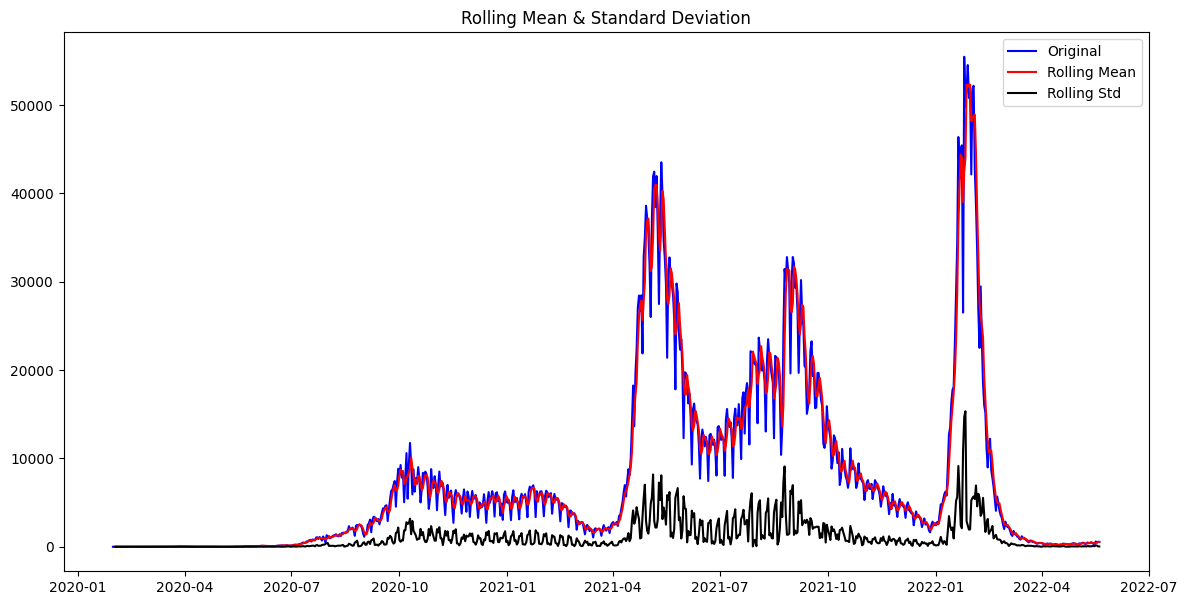

Results of Dickey-Fuller Test
Test Statistic               -2.946537
p value                       0.040198
#Lags used                   20.000000
No:of observations found    820.000000
Critical Value (1%)          -3.438350
Critical Value (5%)          -2.865071
Critical Value (10%)         -2.568650
dtype: float64


In [17]:
test_stationarity(df)

- Since **Test statistic > Critical value(5%)** (or since p value > 0.05), data is **not stationary**

## Converting non stationary data to stationary data

#### Differencing simple moving average

In [18]:
movingAverage = df.rolling(window=3).mean()
df_minus_movingAverage = df - movingAverage
df_minus_movingAverage.head(7)

,Confirmed
Date,
2020-01-31,NaN
2020-02-01,NaN
2020-02-02,0.666667
2020-02-03,0.333333
2020-02-04,-0.666667
2020-02-05,-0.333333
2020-02-06,0.000000


In [19]:
# dropping nan values
df_minus_movingAverage.dropna(inplace=True)
df_minus_movingAverage.head()

,Confirmed
Date,
2020-02-02,0.666667
2020-02-03,0.333333
2020-02-04,-0.666667
2020-02-05,-0.333333
2020-02-06,0.000000


In [20]:
# dropping nan values
movingAverage.dropna(inplace=True)
movingAverage

,Confirmed
Date,
2020-02-02,0.333333
2020-02-03,0.666667
2020-02-04,0.666667
2020-02-05,0.333333
2020-02-06,0.000000
...,...
2022-05-16,357.666667
2022-05-17,413.666667
2022-05-18,473.666667


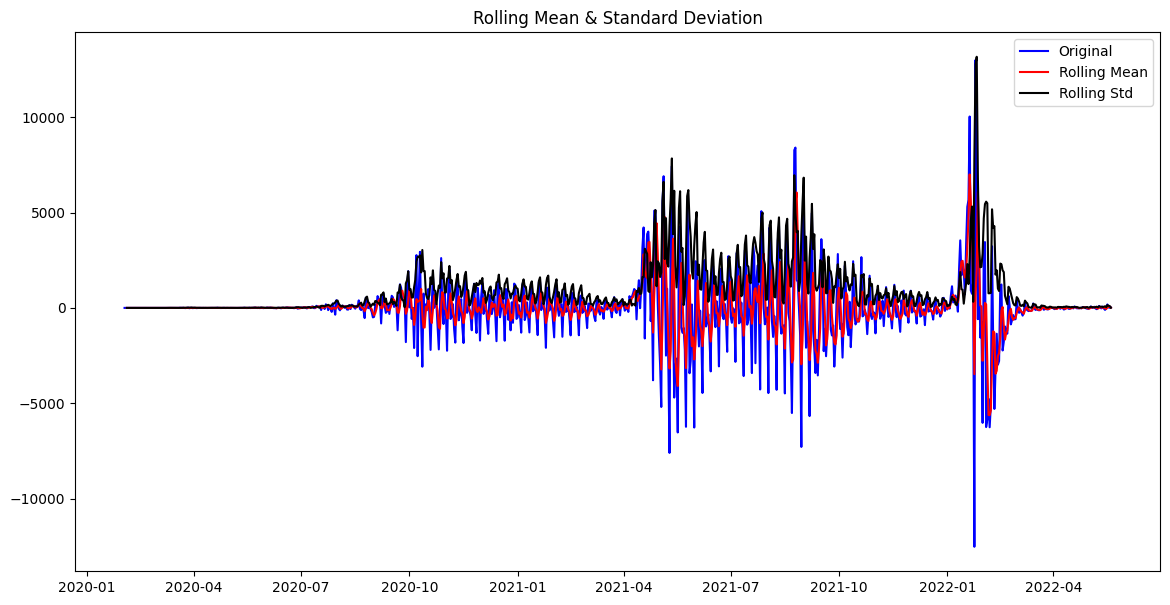

Results of Dickey-Fuller Test
Test Statistic             -7.869480e+00
p value                     5.029881e-12
#Lags used                  1.900000e+01
No:of observations found    8.190000e+02
Critical Value (1%)        -3.438360e+00
Critical Value (5%)        -2.865075e+00
Critical Value (10%)       -2.568653e+00
dtype: float64


In [21]:
test_stationarity(df_minus_movingAverage)

- Since **p value < 0.05**, data is now **stationary**

In [22]:
#checking lags

from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(df_minus_movingAverage)

{'bic':               0             1             2
 0  14961.152599  14923.706500  14874.955735
 1  14945.346618  14870.592538  14872.543567
 2  14901.959291  14873.183689  14805.664767
 3  14896.612793  14876.069948  14764.566371
 4  14888.355116  14893.223536  14756.345810,
 'bic_min_order': (4, 2)}

## ARIMA Model

Plotting ARIMA Model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


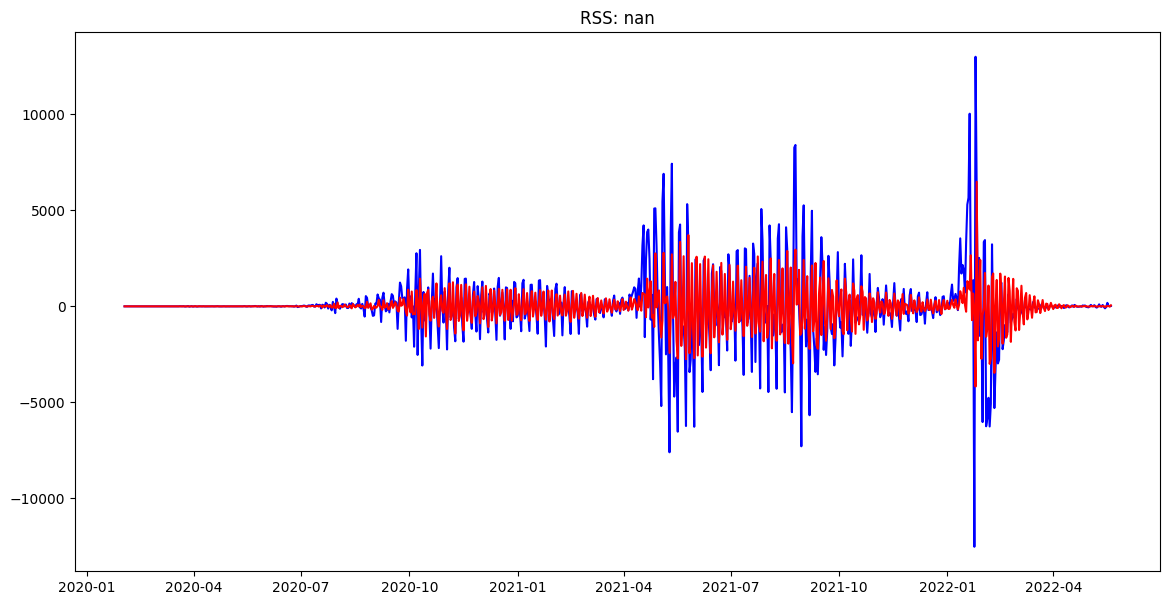

In [23]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model

print('Plotting ARIMA Model')
model = ARIMA(df_minus_movingAverage, order=(4,0,2))
results_ARIMA = model.fit()
plt.plot(df_minus_movingAverage,color='b')
plt.plot(results_ARIMA.fittedvalues, color='r')
plt.title('RSS: {:1.4f}'.format(sum((results_ARIMA.fittedvalues-df['Confirmed'])**2)))
plt.show()

### Getting predictions

In [24]:
# to pandas series
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
pred_ARIMA_diff

Date
2020-02-02     0.664269
2020-02-03     0.664676
2020-02-04     0.594669
2020-02-05     0.401889
2020-02-06     0.691166
                ...    
2022-05-16     4.769239
2022-05-17     9.121197
2022-05-18    19.408147
2022-05-19   -12.617720
2022-05-20    54.060335
Length: 839, dtype: float64

In [25]:
#to dataframe

pred_ARIMA = pred_ARIMA_diff.to_frame()
pred_ARIMA.tail()

,0
Date,
2022-05-16,4.769239
2022-05-17,9.121197
2022-05-18,19.408147
2022-05-19,-12.617720
2022-05-20,54.060335


In [26]:
# converting back to orginal by adding moving averages

model_values = pred_ARIMA[0] + movingAverage['Confirmed']
model_values.tail()

Date
2022-05-16    362.435906
2022-05-17    422.787864
2022-05-18    493.074814
2022-05-19    538.382280
2022-05-20    592.393668
dtype: float64

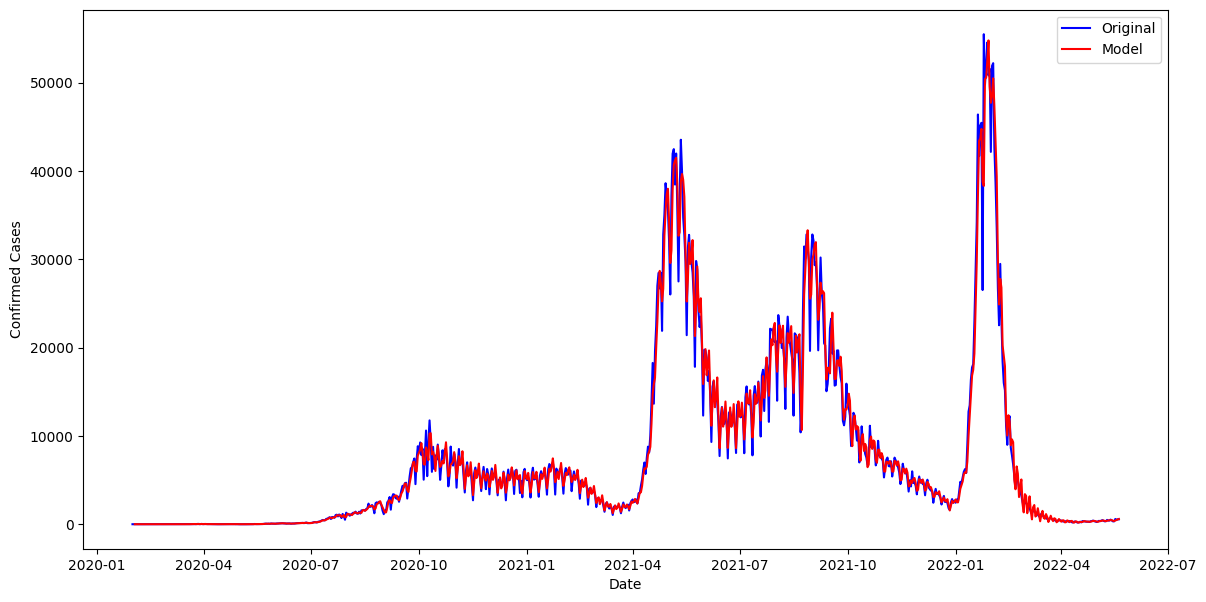

In [27]:
# plotting fitted model
plt.plot(df, color='b', label='Original')
plt.plot(model_values, color='r', label='Model')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(loc='best')
plt.show(block=False)